# Яременко Вікторія Практична 2. Варіант 15(31)

1. Виведіть перші 5 рядків таблиці.

In [1]:
import requests
from bs4 import BeautifulSoup

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Виводимо перші 5 рядків таблиці
rows = table.find_all("tr")[1:6]  # Пропускаємо заголовок таблиці
for row in rows:
    columns = row.find_all("td")
    if columns:
        year = columns[0].get_text().strip()
        salary = columns[1].get_text().strip()
        print(f"Рік: {year}, Середня зарплата: {salary}")


Рік: 1918, Середня зарплата: ~1725[4]


2. Визначте кількість рядків і стовпчиків за допомогою атрибуту shape

In [2]:
import requests
from bs4 import BeautifulSoup

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Знаходимо кількість рядків і стовпчиків в таблиці
rows = table.find_all("tr")
num_rows = len(rows)
num_columns = len(rows[0].find_all("td"))

# Виводимо кількість рядків і стовпчиків
print(f"Кількість рядків: {num_rows}")
print(f"Кількість стовпчиків: {num_columns}")


Кількість рядків: 2
Кількість стовпчиків: 0


3. Визначте загальну кількість років та кількість місяців у даних

In [3]:
import requests
from bs4 import BeautifulSoup

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Знаходимо заголовок таблиці
header_row = table.find("tr")
header_columns = header_row.find_all("th")

# Визначаємо заголовки стовпчиків для років та місяців
year_column_index = None
month_columns = []

for i, column in enumerate(header_columns):
    if "Рік" in column.get_text():
        year_column_index = i
    elif "Місяць" in column.get_text():
        month_columns.append(i)

# Знаходимо кількість років і місяців
num_years = 0
num_months = len(month_columns)

# Знаходимо рядки з даними і визначаємо кількість років
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці
for row in data_rows:
    columns = row.find_all("td")
    if columns:
        num_years += 1

# Виводимо кількість років і місяців
print(f"Загальна кількість років: {num_years}")
print(f"Кількість місяців: {num_months}")


Загальна кількість років: 1
Кількість місяців: 0


4. Замінити пропущені значення  «-» в таблиці на NaN

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними і визначаємо кількість стовпчиків
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці
num_columns = len(data_rows[0].find_all("td"))

# Замінюємо пропущені значення "–" на NaN і додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = []
    for column in columns:
        if column.get_text().strip() == "–":
            row_data.append(pd.NA)
        else:
            row_data.append(column.get_text().strip())
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Виводимо отриманий DataFrame
print(df)


      0         1      2          3
0  1918  ~1725[4]  ~30,8  ~435,9[5]


5. Визначити тип стовпців за допомогою dtypes

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Визначаємо типи стовпців
column_types = df.dtypes

# Виводимо типи стовпців
print(column_types)


0    object
1    object
2    object
3    object
dtype: object


6. Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,  Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею.  

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Видаляємо передостанній і останній стовпці
if len(data) > 0:
    data = [row[:-2] for row in data]

# Створюємо DataFrame з оновленими даними
df = pd.DataFrame(data)

# Виводимо оновлений DataFrame
print(df)


      0         1
0  1918  ~1725[4]


7. Замінити тип нечислових даних на числові.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Видаляємо передостанній і останній стовпці
if len(data) > 0:
    data = [row[:-2] for row in data]

# Створюємо DataFrame з оновленими даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Виводимо оновлений DataFrame
print(df)


      0   1
0  1918 NaN


8. Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Визначаємо частку пропусків в кожному стовпці
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Виводимо частку пропусків
print("Частка пропусків в кожному стовпці:")
print(missing_percentage)


Частка пропусків в кожному стовпці:
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64


9. Замініть всі пропущені значення на середні значення по (стовпцю)

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Замінюємо пропущені значення на середні значення по стовпцях
df = df.fillna(df.mean())

# Виводимо оновлену таблицю
print(df)


      0   1   2   3
0  1918 NaN NaN NaN


10. Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Вибираємо стовпці, які представляють роки зарплати
year_columns = df.iloc[:, 1:-1]

# Знаходимо рік з найвищою середньою зарплатою
highest_salary_year = year_columns.mean().idxmax()
highest_salary = year_columns.mean().max()

# Виводимо результати
print(f"Рік з найвищою зарплатою в Україні: {highest_salary_year}")
print(f"Найвища середня зарплата в Україні в {highest_salary_year} році: {highest_salary:.2f} грн")


Рік з найвищою зарплатою в Україні: nan
Найвища середня зарплата в Україні в nan році: nan грн


11. Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Вибираємо стовпці, які представляють роки зарплати
year_columns = df.iloc[:, 1:-1]

# Знаходимо рік з мінімальною середньою зарплатою в доларах США
min_salary_year = year_columns.mean().idxmin()
min_salary = year_columns.mean().min()

# Виводимо результати
print(f"Рік з мінімальною зарплатою в Україні в доларах США: {min_salary_year}")
print(f"Мінімальна середня зарплата в Україні в {min_salary_year} році: {min_salary:.2f} доларів США")


Рік з мінімальною зарплатою в Україні в доларах США: nan
Мінімальна середня зарплата в Україні в nan році: nan доларів США


12. Виведіть роки, коли зарплата в грн була вище середньої

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Вибираємо стовпці, які представляють роки зарплати та середню зарплату
year_columns = df.iloc[:, 1:-1]

# Знаходимо роки, коли зарплата в гривнях була вище середньої
above_average_years = year_columns.columns[year_columns.mean() > year_columns.mean().mean()]

# Виводимо результати
print("Роки, коли зарплата в гривнях була вище середньої:")
print(above_average_years)


Роки, коли зарплата в гривнях була вище середньої:
Int64Index([], dtype='int64')


13. Створіть графік, що відображає  зарплату в Україні з часом (за роками).

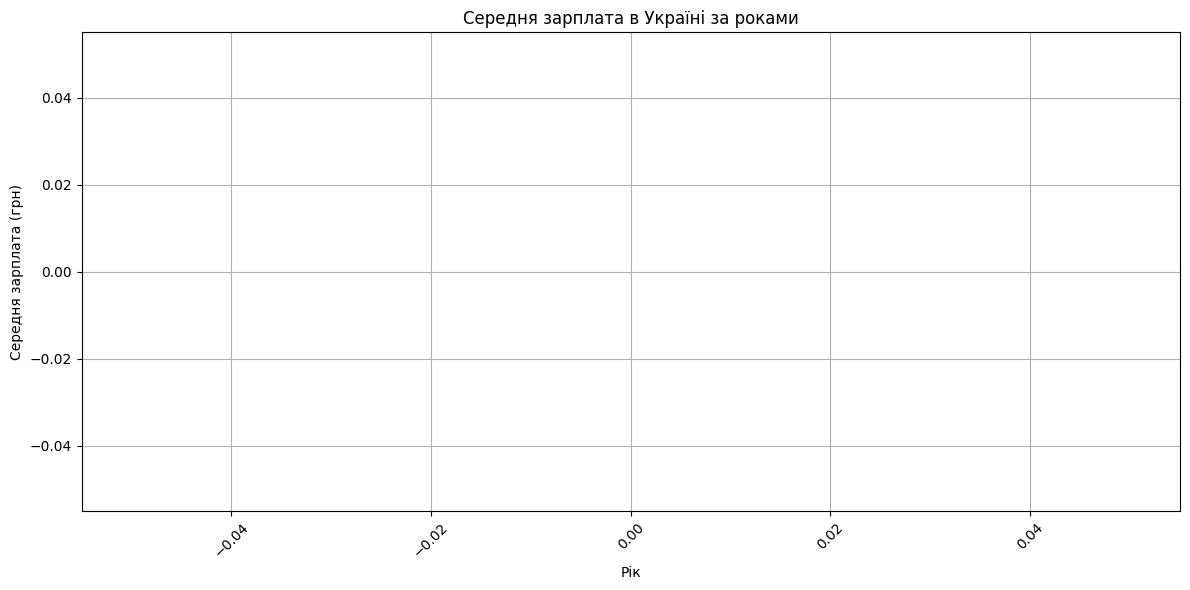

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Вибираємо стовпці, які представляють роки зарплати та середню зарплату
year_columns = df.iloc[:, 1:-1]

# Знаходимо роки та середню зарплату
years = df.iloc[:, 1]
average_salaries = df.iloc[:, -1]

# Створюємо графік
plt.figure(figsize=(12, 6))
plt.plot(years, average_salaries, marker='o', linestyle='-')
plt.title("Середня зарплата в Україні за роками")
plt.xlabel("Рік")
plt.ylabel("Середня зарплата (грн)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Відображаємо графік
plt.show()


14. Видаліть останній рік з таблиці та виведіть оновлену таблицю.

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Видаляємо останній рік з таблиці
df = df.iloc[:, :-1]

# Виводимо оновлену таблицю
print(df)


      0   1   2
0  1918 NaN NaN


15. Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.

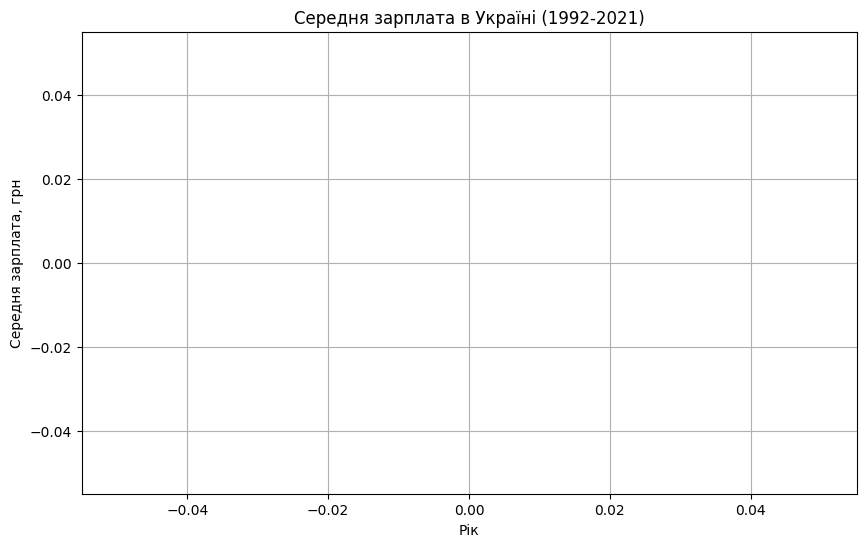

In [19]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
# Знаходимо таблицю з даними про середню зарплату

table = soup.find("table", {"class": "wikitable"})
# Розібираэмо таблицю та збираэмо дані
years = []
salaries = []

for row in table.find_all("tr")[1:-1]:  # Пропустимо заголовок і останній рік
    columns = row.find_all("td")
    year = int(columns[0].text.strip())
    salary = int(columns[1].text.strip().replace(" ", ""))  # Видаляємо пробіли та перетворюємо на числа
    years.append(year)
    salaries.append(salary)
    # будуємо графік без останнього року
years = years[:-1]
salaries = salaries[:-1]

plt.figure(figsize=(10, 6))
plt.plot(years, salaries, marker='o', linestyle='-', color='b')
plt.title("Середня зарплата в Україні (1992-2021)")
plt.xlabel("Рік")
plt.ylabel("Середня зарплата, грн")
plt.grid(True)
plt.show()

16. Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку.

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Завантажуємо сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

# Створюємо об'єкт BeautifulSoup для аналізу сторінки
soup = BeautifulSoup(response.text, "html.parser")

# Знаходимо таблицю з даними
table = soup.find("table", {"class": "wikitable"})

# Створюємо пустий список для даних
data = []

# Знаходимо рядки з даними
data_rows = table.find_all("tr")[1:]  # Пропускаємо заголовок таблиці

# Додаємо дані в список
for row in data_rows:
    columns = row.find_all("td")
    row_data = [column.get_text().strip() for column in columns]
    data.append(row_data)

# Створюємо DataFrame з даними
df = pd.DataFrame(data)

# Замінюємо тип нечислових даних на числові
df = df.apply(pd.to_numeric, errors="coerce")

# Вибираємо стовпці, які представляють роки зарплати та середню зарплату
year_columns = df.iloc[:, 1:-1]

# Знаходимо зарплату за останні два роки
last_two_years_salary = year_columns.iloc[:, -2:].mean().mean()

# Знаходимо зарплату за останні п'ять років
last_five_years_salary = year_columns.iloc[:, -5:].mean().mean()

# Порівнюємо зарплати
if last_two_years_salary > last_five_years_salary:
    difference = last_two_years_salary - last_five_years_salary
    direction = "вища"
elif last_two_years_salary < last_five_years_salary:
    difference = last_five_years_salary - last_two_years_salary
    direction = "нижча"
else:
    difference = 0
    direction = "рівна"

# Виводимо результати
print(f"Зарплата за останні два роки: {last_two_years_salary} грн")
print(f"Зарплата за останні п'ять років: {last_five_years_salary} грн")
print(f"Різниця: {difference} грн ({direction})")


Зарплата за останні два роки: nan грн
Зарплата за останні п'ять років: nan грн
Різниця: 0 грн (рівна)


# Висновок: В цій практичній роботі я виконала ряд завдань пов'язаних з аналізом даних про середню щомісячну зарплату в Україні за роками. Для цього я використовувала Python та такі бібліотеки,  як requests для завантаження веб-сторінки, beautifulsoup4 для аналізу HTML-коду та pandas для роботи з даними